In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
%matplotlib inline
sns.set_style('whitegrid')

In [77]:
train = pd.read_csv('titanic_train.csv')

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

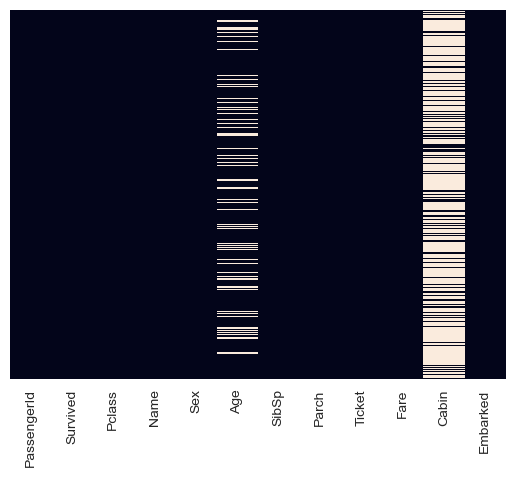

In [79]:
# Checking all the columns of dataset for null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

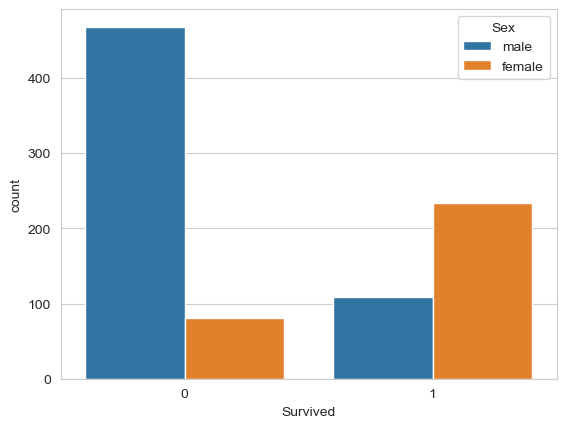

In [80]:
# sns.countplot(x='Survived', data=train)
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

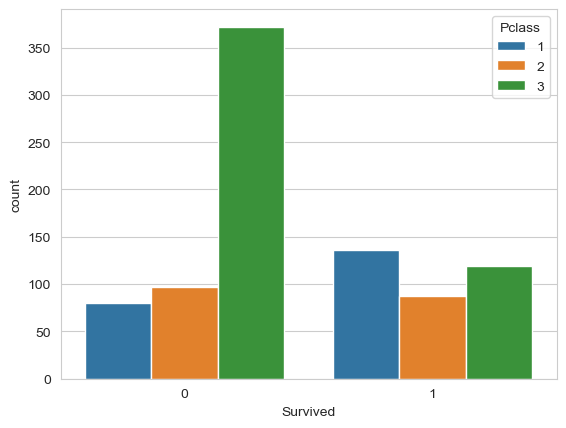

In [81]:
sns.countplot(x='Survived', hue='Pclass', data=train)

C:\Users\harsh\anaconda3\envs\common\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

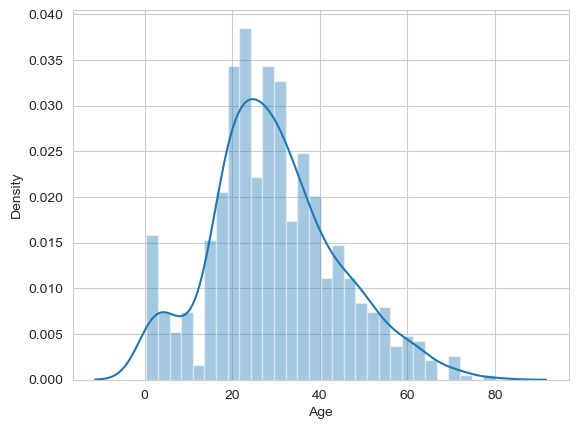

In [82]:
sns.distplot(train['Age'].dropna(), bins=30)

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

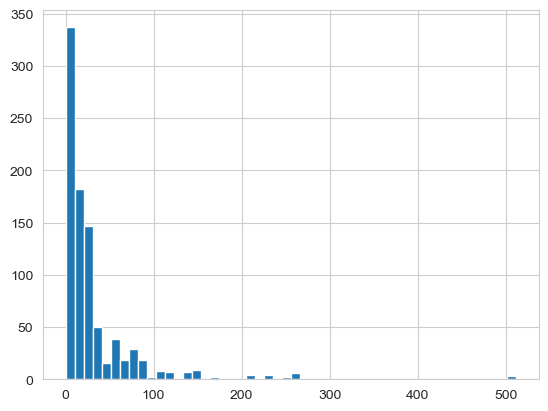

In [84]:
train['Fare'].hist(bins=50)

# Tackling with missing data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

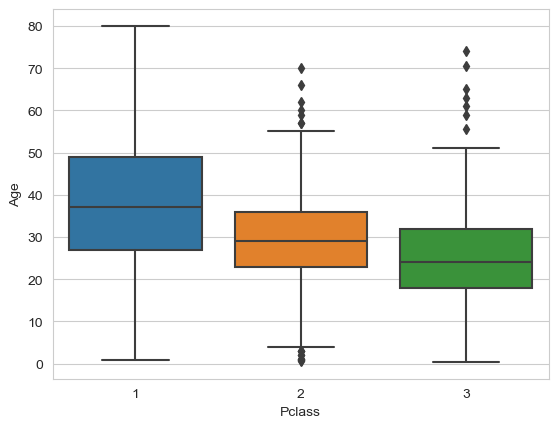

In [85]:
# Replaacing null values in age column with average age of each class
sns.boxplot(x='Pclass', y='Age', data=train)

In [86]:
train.groupby('Pclass').mean()['Age']
# Result from above code shows that
# avg age of people from Pclass = 1 was 38.2
# avg age of people from Pclass = 2 was 29.8
# avg age of people from Pclass = 3 was 25.14

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [87]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [88]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

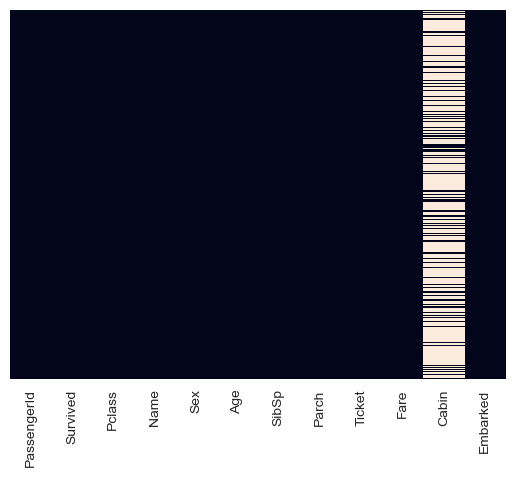

In [89]:
# Checking all the columns of dataset for null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [90]:
# Drop the cabin column
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

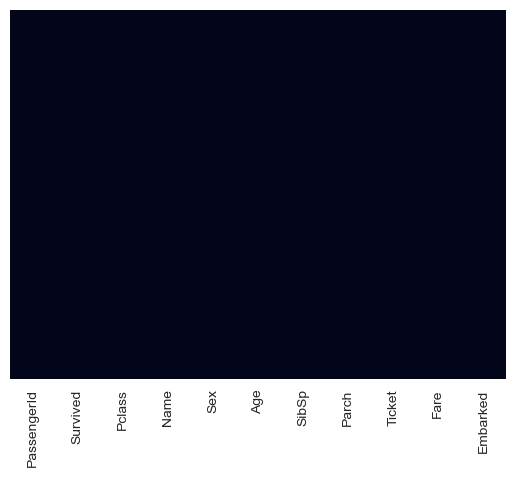

In [91]:
# Checking all the columns of dataset for null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
# So now we don't have any columns with null values

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [93]:
train.dropna(inplace=True)

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Turning Catagorical column into Numerical column

In [95]:
# Creating dummy column fro Sex column
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [96]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [97]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [98]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [99]:
train = pd.concat([train, sex, embark], axis=1)

In [100]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [101]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [102]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [103]:
train.drop('PassengerId', axis=1, inplace=True)

In [104]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


# Lets begin the logistic regression

In [105]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel = LogisticRegression()

In [110]:
logmodel.fit(X_train, y_train)

C:\Users\harsh\anaconda3\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
predictions = logmodel.predict(X_test)

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [115]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

In [116]:
accuracy_score(y_test, predictions)

0.8314606741573034

#### Above Logistic Regression was performed according to the train dataframe we had . We can do many feature engineering to get more optimized result

#### Let us do one feature engineering on the train dataset and compare the result. The change we are going to make is we are going to create dummy variable for PClass as well and concatinate with our existing dataframe

In [117]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [118]:
people_class = pd.get_dummies(train['Pclass'], drop_first=True)

In [119]:
people_class.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [120]:
people_class.columns = ['Second_class', 'Third_class']

In [121]:
people_class.head()

,Second_class,Third_class
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [122]:
new_data = pd.concat([train, people_class], axis=1)

In [123]:
new_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Second_class,Third_class
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [124]:
X = new_data.drop('Survived', axis=1)
y = new_data['Survived']

In [125]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [126]:
new_log = LogisticRegression()

In [127]:
new_log.fit(X_train, y_train)

C:\Users\harsh\anaconda3\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
pred = new_log.predict(X_test)

In [129]:
confusion_matrix(y_test, pred)

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [130]:
accuracy_score(y_test, pred)

0.8239700374531835